In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('day-24-feature-scaling-standardization-Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
df = df.iloc[:, 2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### Train test split

In [25]:
from sklearn.model_selection import train_test_split

features = df.drop('Purchased', axis='columns')  # Age, EstimatedSalary
target = df['Purchased']  # Purchased

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
x_train, x_test, y_train, y_test

(     Age  EstimatedSalary
 92    26            15000
 223   60           102000
 234   38           112000
 232   40           107000
 377   42            53000
 ..   ...              ...
 323   48            30000
 192   29            43000
 117   36            52000
 47    27            54000
 172   26           118000
 
 [280 rows x 2 columns],
      Age  EstimatedSalary
 132   30            87000
 309   38            50000
 341   35            75000
 196   30            79000
 246   35            50000
 ..   ...              ...
 216   49            65000
 259   45           131000
 49    31            89000
 238   46            82000
 343   47            51000
 
 [120 rows x 2 columns],
 92     0
 223    1
 234    0
 232    1
 377    0
       ..
 323    1
 192    0
 117    0
 47     0
 172    0
 Name: Purchased, Length: 280, dtype: int64,
 132    0
 309    0
 341    0
 196    0
 246    0
       ..
 216    0
 259    1
 49     0
 238    0
 343    1
 Name: Purchased, Length: 120, dt

### StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [35]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [37]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [42]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [55]:
x_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [56]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effect of Scaling

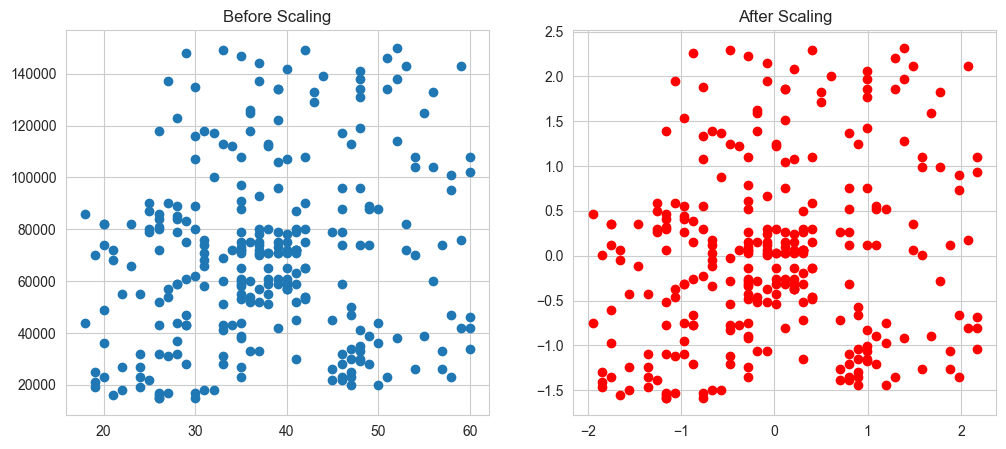

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')

ax1.set_title("Before Scaling")  # BLUE
ax2.set_title("After Scaling")  # RED

plt.show()

/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

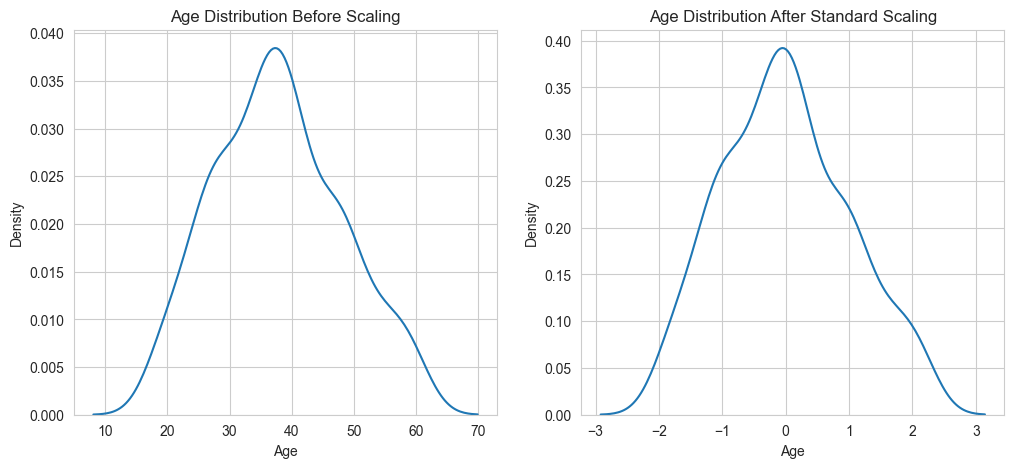

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)

plt.show()

### Why scaling is important?

In [74]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [75]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [76]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr.predict(x_test_scaled)

In [78]:
from sklearn.metrics import accuracy_score

print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.375
